In [0]:
# Get dataset
!wget -O "./GSE87571_Matrix_Avg_Beta.txt.gz" "https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSE87571&format=file&file=GSE87571%5Fmatrix1of2%2Etxt%2Egz"
!wget -O "./GSE87571_Matrix_Avg_Beta2.txt.gz" "https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSE87571&format=file&file=GSE87571%5Fmatrix2of2%2Etxt%2Egz"


--2019-11-20 15:11:01--  https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSE87571&format=file&file=GSE87571%5Fmatrix1of2%2Etxt%2Egz
Resolving www.ncbi.nlm.nih.gov (www.ncbi.nlm.nih.gov)... 130.14.29.110, 2607:f220:41e:4290::110
Connecting to www.ncbi.nlm.nih.gov (www.ncbi.nlm.nih.gov)|130.14.29.110|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1465794128 (1.4G) [application/octet-stream]
Saving to: ‘./GSE87571_Matrix_Avg_Beta.txt.gz’

./GSE87571_Matrix_A 100%[===================>]   1.36G  8.41MB/s    in 2m 17s  

2019-11-20 15:13:18 (10.2 MB/s) - ‘./GSE87571_Matrix_Avg_Beta.txt.gz’ saved [1465794128/1465794128]

--2019-11-20 15:13:19--  https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSE87571&format=file&file=GSE87571%5Fmatrix2of2%2Etxt%2Egz
Resolving www.ncbi.nlm.nih.gov (www.ncbi.nlm.nih.gov)... 130.14.29.110, 2607:f220:41e:4290::110
Connecting to www.ncbi.nlm.nih.gov (www.ncbi.nlm.nih.gov)|130.14.29.110|:443... connected.
HTTP request sent, awaiting respon

In [0]:
# Extract dataset
!gunzip "./GSE87571_Matrix_Avg_Beta.txt.gz"
!gunzip "./GSE87571_Matrix_Avg_Beta2.txt.gz"


In [0]:
# Merge prepare to merge text files
!cut -d$'\t' -f1 --complement "./GSE87571_Matrix_Avg_Beta2.txt" > newFile && mv newFile "./GSE87571_Matrix_Avg_Beta2.txt"

In [0]:
# Merge text files
!paste "GSE87571_Matrix_Avg_Beta.txt" "./GSE87571_Matrix_Avg_Beta2.txt" > matrix.csv

In [0]:
# Remove every other column because every other column has blank values
!awk '{{printf "%s ", $1}for(i=2;i<=NF;i=i+2){printf "%s ", $i}{printf "%s", RS}}' matrix.csv > cut_matrix.csv

In [0]:
# Get a sneak peak
!head -5 matrix.csv
!head -5 cut_matrix.csv

ID_REF	X1	X1.1	X10	X10.1	X100	X100.1	X101	X101.1	X102	X102.1	X103	X103.1	X104	X104.1	X105	X105.1	X106	X106.1	X107	X107.1	X108	X108.1	X109	X109.1	X11	X11.1	X110	X110.1	X111	X111.1	X112	X112.1	X113	X113.1	X114	X114.1	X115	X115.1	X116	X116.1	X117	X117.1	X118	X118.1	X119	X119.1	X12	X12.1	X120	X120.1	X121	X121.1	X122	X122.1	X123	X123.1	X124	X124.1	X125	X125.1	X126	X126.1	X127	X127.1	X128	X128.1	X129	X129.1	X13	X13.1	X130	X130.1	X131	X131.1	X132	X132.1	X133	X133.1	X134	X134.1	X135	X135.1	X136	X136.1	X137	X137.1	X138	X138.1	X139	X139.1	X14	X14.1	X140	X140.1	X141	X141.1	X142	X142.1	X143	X143.1	X144	X144.1	X145	X145.1	X146	X146.1	X147	X147.1	X148	X148.1	X149	X149.1	X15	X15.1	X150	X150.1	X151	X151.1	X152	X152.1	X153	X153.1	X154	X154.1	X155	X155.1	X156	X156.1	X157	X157.1	X158	X158.1	X159	X159.1	X16	X16.1	X160	X160.1	X161	X161.1	X162	X162.1	X163	X163.1	X164	X164.1	X165	X165.1	X166	X166.1	X167	X167.1	X168	X168.1	X169	X169.1	X17	X17.1	X170	X170.1	X171	X171.1	X172	X172.1	X173	X173.1	X174	X174.1	X175	

In [0]:
# Import necessary libraries

import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt # NOTE: This was tested with matplotlib v. 2.1.0
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns

# import tensorflow

from __future__ import absolute_import, division, print_function, unicode_literals

# Install TensorFlow
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf

TensorFlow 2.x selected.


In [0]:
# Read data from txt file into dataframe
data = pd.read_csv("./cut_matrix.csv", sep=' ', low_memory=False, index_col = 0)
#data.set_index("ID_REF", inplace = True) 


In [0]:
# Drop extra column
data.drop(columns=['Unnamed: 733'], inplace=True)

In [0]:
# Filtering for cgp values used by other research papers
spots16 = ["cg19761273", "cg27544190", "cg03286783", "cg01511567", "cg07158339", "cg05442902", "cg24450312", "cg17274064", "cg02085507", "cg20692569", "cg04528819", "cg08370996", "cg04084157", "cg22736354", "cg06493994", "cg02479575"]
spots6 = ["cg09809672", "cg22736354", "cg02228185", "cg01820374", "cg06493994", "cg19761273"]
spots19 = list(set(spots6 + spots16))
print(len(spots19))
data19 = data[data.index.isin(spots19)]
print(data19)

19
                  X1       X10      X100  ...       X97       X98       X99
ID_REF                                    ...                              
cg24450312  0.093517  0.052120  0.071338  ...  0.100749  0.068033  0.059896
cg02085507  0.592652  0.646555  0.597481  ...  0.542178  0.602477  0.437280
cg02479575  0.067175  0.031035  0.050084  ...  0.031944  0.042864  0.051050
cg09809672  0.439978  0.561492  0.472707  ...  0.670256  0.533587  0.568377
cg06493994  0.301363  0.226076  0.236535  ...  0.199415  0.223322  0.181485
cg22736354  0.369994  0.261739  0.296304  ...  0.216095  0.275692  0.255030
cg04084157  0.209698  0.175008  0.168455  ...  0.174045  0.164404  0.148629
cg04528819  0.219496  0.184485  0.174820  ...  0.149679  0.190895  0.137180
cg20692569  0.458993  0.446432  0.393042  ...  0.450692  0.452906  0.425551
cg07158339  0.352007  0.482019  0.474101  ...  0.484157  0.479169  0.449241
cg01511567  0.241326  0.264090  0.232088  ...  0.287522  0.238451  0.279440
cg0182037

In [0]:
data_filter_19 = False

In [0]:
# Setup annotations

# decide between 19 cgp and full set
 if (data_filter_19):
   data_f = data19.T
 else:
   data_f = data.T
 
print(data_f)
#data_f = data_f.dropna(axis = 1)
#data_f = data_f.set_index("ID_REF")
#print(data_f)

# prepare index
annotations = pd.read_csv("GSE87571_series_matrix.csv", index_col=0, header=None).T
#print(annotations.columns)
print(annotations.head())
#print(annotations["Age"].head())
#print(annotations.tail)

#annotations.Sample_title = annotations.Sample_title.str[:annotations.Sample_title.str.index(" ")]
#print(annotations.Sample_title)

for i, title in enumerate(annotations["Sample_title"]):
  annotations["Sample_title"][i + 1] = title[:title.index(" ")]



annotations.set_index("Sample_title", inplace=True)
annotations.drop(["Tissue", "Disease"], axis=1, inplace=True)

annotations['Gender'] = annotations['Gender'].str.replace('gender: ','')
annotations['Age'] = (annotations['Age'].str.replace('age: ',''))

#print(annotations[~annotations[annotations['Age'].str.contains("NA")]])
#print(len(annotations[annotations.Age != 'NA']))



annotations.sort_index(inplace=True)
data_f.sort_index(inplace=True)
data_f = data_f.astype(float)
data_f["Age"] = annotations["Age"]

print(data_f.shape)
data_f.dropna(axis=1, inplace=True)
print(data_f.shape)
data_f = data_f[data_f.Age != "NA"]
data_f.Age = data_f.Age.astype(float)
print(data_f.shape)
print(data_f.head())

ID_REF  cg00050873  cg00212031  ...  ch.22.47579720R  ch.22.48274842R
X1        0.824023    0.031579  ...         0.083398         0.028080
X10            NaN         NaN  ...         0.112058         0.035582
X100           NaN         NaN  ...         0.070752         0.023578
X101           NaN         NaN  ...         0.095896         0.025565
X102           NaN         NaN  ...         0.056537         0.031796
...            ...         ...  ...              ...              ...
X95       0.829739    0.072655  ...         0.080128         0.034908
X96            NaN         NaN  ...         0.072277         0.028587
X97       0.832990    0.066660  ...         0.070170         0.031882
X98            NaN         NaN  ...         0.091591         0.032754
X99       0.852145    0.045496  ...         0.086221         0.033597

[732 rows x 485512 columns]
0                     Sample_title  ...                Disease
1  X1 genomic DNA from whole blood  ...  disease state: normal
2  X2

19
(729, 19)
ID_REF  cg07158339  cg01820374  cg02228185  ...  cg06493994  cg24450312   Age
X685      0.467281    0.304686    0.563140  ...    0.270643    0.073834  87.0
X627      0.327895    0.216428    0.723304  ...    0.264262    0.057831  88.0
X671      0.232353    0.233052    0.685258  ...    0.292809    0.043923  91.0
X51       0.433441    0.268793    0.822837  ...    0.276858    0.078555  91.0
X463      0.210424    0.357011    0.775370  ...    0.297090    0.074307  94.0

[5 rows x 20 columns]
X167    14.0
X629    15.0
X124    15.0
X708    15.0
X485    15.0
        ... 
X685    87.0
X627    88.0
X671    91.0
X51     91.0
X463    94.0
Name: Age, Length: 729, dtype: float64


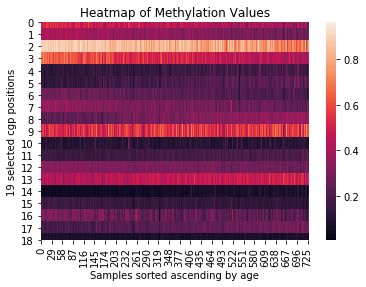

In [0]:
# Visualize data19 in heatmap and remove unwanted values
print(len(spots19))
data19 = data_f[spots19]
print(data19.shape)

#data19["Age"] = data_f.Age
data19 = data19.assign(Age = data_f.Age)
data19 = data19.sort_values("Age")
data19 = data19.dropna(axis=0, how='any')

print(data19.tail())
data19_ages = data19["Age"]
np.save("data19_ages.npy", data19_ages)
data19.drop("Age", inplace=True, axis=1)
data19 = data19.to_numpy()
np.save("data19.npy", data19)

ax = plt.axes()
sns.heatmap(data19.T, annot=False, ax = ax)

ax.set_title('Heatmap of Methylation Values')

ax.set_xlabel("Samples sorted ascending by age")
ax.set_ylabel("19 selected cgp positions")
plt.savefig('heatmap19.jpg')
print(data19_ages)


      Iter       Train Loss      OOB Improve   Remaining Time 
         1          17.5820           0.4174            2.05s
         2          17.2307           0.4117            1.39s
         3          16.7553           0.3895            1.15s
         4          15.6488           0.4097            1.03s
         5          15.4087           0.3811            0.95s
         6          14.7234           0.3668            0.90s
         7          14.8851           0.3470            0.86s
         8          15.0861           0.3477            0.83s
         9          13.6553           0.3607            0.81s
        10          13.4848           0.3132            0.78s
        20          10.8314           0.2313            0.65s
        30           8.2834           0.1484            0.60s
        40           7.0445           0.1141            0.56s
        50           5.9014           0.0627            0.53s
        60           5.0303           0.0600            0.50s
       

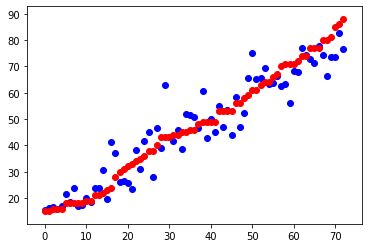

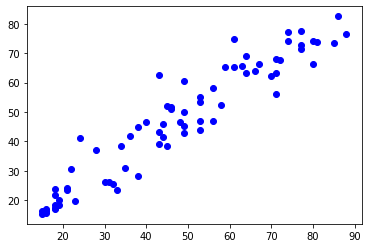

In [0]:
# Trying GradientBoostingRegressor Learning
from sklearn.ensemble.gradient_boosting import GradientBoostingRegressor

#X_train, X_test, y_train, y_test = train_test_split(data_f, annotations["Age_Group"], test_size=0.10)
X_train, X_test, y_train, y_test = train_test_split(data19, data19_ages, test_size=0.10)

gb = GradientBoostingRegressor(loss='lad', learning_rate=0.03, n_estimators=300, max_features='log2', subsample = 0.6, min_samples_split=2, max_depth=4, verbose = 1, warm_start = True)
gb.fit(X_train, y_train)
y = gb.predict(X_test)

print(y.shape)
print(y_test.shape)

df = pd.DataFrame({"Real":y_test, "Pred":y.reshape(73)})
df = df.sort_values(by=['Real'])
plt.scatter(x = range(73), y = df.Pred, c = 'b')
plt.scatter(x = range(73), y = df.Real, c = 'r')
plt.show()
plt.scatter(x = df.Real, y = df.Pred, c = 'b')

In [0]:
X_train, X_test, y_train, y_test = train_test_split(data19, data19_ages, test_size=0.10)

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(19,)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
])


model.summary()

# Compile model
model.compile(loss= "mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])
model.fit(X_train, y_train.to_numpy(),  epochs=50, validation_data=(X_test, y_test.to_numpy()))


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               10240     
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                

In [0]:
model.save("final_weights.h5")
model.save("keras.h5")

In [0]:
!pip install tensorflowjs 

     |████████████████████████████████| 61kB 3.2MB/s 
     |████████████████████████████████| 81kB 6.0MB/s 
     |████████████████████████████████| 2.8MB 11.9MB/s 
     |████████████████████████████████| 17.3MB 36.7MB/s 
     |████████████████████████████████| 512kB 60.5MB/s 
     |████████████████████████████████| 3.8MB 42.6MB/s 
     |████████████████████████████████| 256kB 61.9MB/s 
     |████████████████████████████████| 890kB 54.9MB/s 
     |████████████████████████████████| 645kB 52.8MB/s 
  Created wheel for PyInquirer: filename=PyInquirer-1.0.3-cp36-none-any.whl size=32853 sha256=7ca3ff0cb50079efa8f18162af266927b26d57f0ac1619833dee95f0f4933bc9
  Stored in directory: /root/.cache/pip/wheels/52/6c/b1/3e4b0e8daf42a92883c7641c0ea8ffb62e0490ebed2faa55ad
Successfully built PyInquirer
ERROR: tensorflow-gpu 2.0.0 has requirement tensorboard<2.1.0,>=2.0.0, but you'll have tensorboard 1.15.0 which is incompatible.
ERROR: tensorflow-gpu 2.0.0 has requirement tensorflow-estimator<2.1.0,>=2

In [0]:
!mkdir model
!tensorflowjs_converter --input_format keras keras.h5 model/

mkdir: cannot create directory ‘model’: File exists


In [0]:
!zip -r model.zip model 

  adding: model/ (stored 0%)
  adding: model/group1-shard1of1.bin (deflated 8%)
  adding: model/model.json (deflated 80%)


In [0]:
print(keras.V)

NameError: ignored

In [0]:
model.load_weights('model_weights.index')

In [0]:
# for generating submission
np.save("X_test.npy", X_test)
np.save("X_train.npy", X_train)
y = model.predict(X_test)
y_ = model.predict(X_train)

dfd = abs(y[:, 0] - y_test)
dfc = abs(y_test.mean() - y_test)
dfsum = pd.DataFrame(dfd < 10)
dfcsum = pd.DataFrame(dfc < 10)
print("Machine Learning:")
print(dfsum.sum() / len(dfsum))
print("Guess Mean:")
print(dfcsum.sum() / len(dfcsum))

##  Comparing Real and Predicted Ages by Index (Validation Set)
df = pd.DataFrame({"Real":y_test, "Pred":y.reshape(73)})
df = df.sort_values(by=['Real'])
pr = plt.scatter(x = range(73), y = df.Pred, c = 'b')
re = plt.scatter(x = range(73), y = df.Real, c = 'r')
plt.xlabel('Indexes Sorted By Real Age')
plt.ylabel('Age')
plt.suptitle('Comparing Real and Predicted Ages by Index (Validation Set)')

plt.legend((pr, re),
  ('Predicted', 'Real'),
  scatterpoints=1,
  loc='upper left',
  ncol=1,
  fontsize=8)

plt.savefig('Comparing Real and Predicted Ages by Index (Validation Set)')
plt.show()

## Comparing Real and Predicted Ages by Index (Training Set)
df = pd.DataFrame({"Real":y_train, "Pred":y_.reshape(656)})
df = df.sort_values(by=['Real'])
pr = plt.scatter(x = range(656), y = df.Pred, c = 'b')
re = plt.scatter(x = range(656), y = df.Real, c = 'r')
plt.xlabel('Indexes Sorted By Real Age')
plt.ylabel('Age')
plt.suptitle('Comparing Real and Predicted Ages by Index (Training Set)')

plt.legend((pr, re),
  ('Predicted', 'Real'),
  scatterpoints=1,
  loc='upper left',
  ncol=1,
  fontsize=8)

plt.savefig('Comparing Real and Predicted Ages by Index (Training Set)')
plt.show()


## Plotting Predicted Age against Real Age (Validation Set)
plt.scatter(x=y_test, y=y.reshape(73))
np.save("y_valid_real.npy", y_test)
np.save("y_valid_pred.npy", y.reshape(73))

plt.xlabel('Real Age')
plt.ylabel('Predicted Age')
plt.suptitle('Plotting Predicted Age against Real Age (Validation Set)')

plt.savefig('Plotting Predicted Age against Real Age (Validation Set)')
plt.show()


## Plotting Predicted Age against Real Age (Training Set)
plt.scatter(x=y_train, y=y_.reshape(656), c='b')

plt.xlabel('Real Age')
plt.ylabel('Predicted Age')
plt.suptitle('Plotting Predicted Age against Real Age (Training Set)')

plt.savefig('Plotting Predicted Age against Real Age (Training Set)')
plt.show()

In [0]:
print(data_numpy_del.shape)
print(data_numpy_chi.shape)

In [0]:
data_head = data_numpy_chi.T
df_heat_red = pd.DataFrame(data_head)
df_heat_red = df_heat_red.T.set_index(annotations.index)
print(df_heat_red.shape)
print(annotations["Age_Group"].shape)
annotations = annotations.dropna()
print(annotations["Age_Group"])
print(df_heat_red.index)
print(annotations.index)

df_heat_red["Age"] = annotations["Age_Group"]
print(df_heat_red["Age"])

In [0]:
cmap = sns.diverging_palette(118, 0, sep=10, center="dark", as_cmap=True)

In [0]:
#print(df_heat_red.head())
print(df_heat_red.head())
df_heat_red["Age"] = annotations["Age_Group"]
df_heat_red = df_heat_red.sort_values("Age")
print(df_heat_red.head())
df_heat_red = df_heat_red.drop("Age", axis=1)
sns.heatmap(df_heat_red.T, annot=False)

In [0]:
model.save_weights("nn weights")

In [0]:

  model = tf.keras.models.Sequential([
    tf.keras.layers.Reshape((4, 4, 1), input_shape=(16,)),
    tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu',padding='same'),
    tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu',padding='same'),
    #tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    # tf.keras.layers.Dense(256, activation='relu'),
    # tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    #tf.keras.layers.Dense(2, activation='softmax')
    tf.keras.layers.Dense(1)
])